In [3]:
import networkx as nx
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade
from influence_max_algorithms import MIA
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import time as time


In [2]:
pb2020 = nx.read_gml('/Users/davidguzman/Documents/GitHub/Network-Science-final-Maximization-/Proud_Boys_Datsets/PB2020.gml')

In [4]:
#invert edge direction for PB2020
pb2020 = pb2020.reverse()

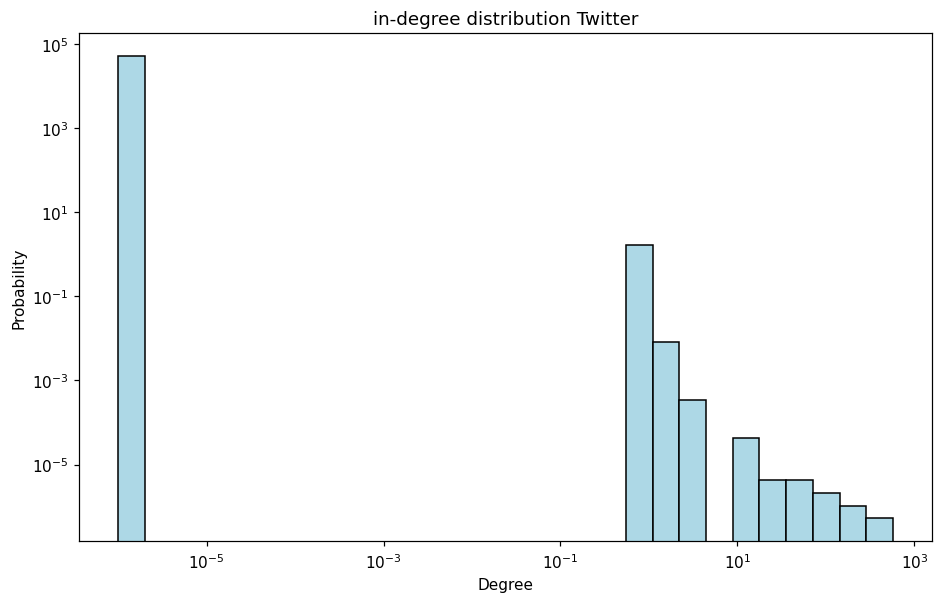

In [5]:
#print in-degree distribution for pb2020
deg = [d for n, d in pb2020.out_degree()] # we use out degree because they inverted the direction of the edges
# replace 0 values with 0.000001
deg = [0.000001 if x == 0 else x for x in deg]
plt.figure(figsize=(10,6), dpi=110)
my_bins = np.logspace(np.log10(min(deg)),np.log10(max(deg) +1), 30 ) 
plt.hist(deg, bins=my_bins, density = True, color = "lightblue", ec="black")
plt.title("in-degree distribution Twitter")
plt.ylabel("Probability")
plt.xlabel("Degree") 
plt.xscale('log')
plt.yscale('log')
plt.show()

# Weighted Cascade probabilities + MIA

In [6]:
weighted_cascade_model_2020 = Weighted_Cascade()
weighted_cascade_model_2020.fit(pb2020)

In [11]:
# overwrite the weights in pb20_comms_subgraphs[12] as q/in-degree of the node for the outgoing edges of said node, where q=1
pb2020_weighted_cascade = pb2020.copy()
for edge in pb2020_weighted_cascade.edges():
    prob = weighted_cascade_model_2020.probability[weighted_cascade_model_2020.label2id[edge[0]], weighted_cascade_model_2020.label2id[edge[1]]]
    
    if pb2020_weighted_cascade.in_degree(edge[0]) == 0: # to avoid division by 0
        
        pb2020_weighted_cascade[edge[0]][edge[1]]['weight'] = prob
        pb2020_weighted_cascade[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
    else:
        
        pb2020_weighted_cascade[edge[0]][edge[1]]['weight'] = prob
        pb2020_weighted_cascade[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))


In [41]:
# print unique weights 
new = np.unique([pb2020_weighted_cascade[edge[0]][edge[1]]['weight'] for edge in pb2020_weighted_cascade.edges()])
new

array([2.29042602e-04, 2.63088661e-04, 7.01262272e-04, 1.12866817e-03,
       1.65562914e-03, 1.94552529e-03, 5.12820513e-03, 5.34759358e-03,
       5.61797753e-03, 5.98802395e-03, 8.54700855e-03, 9.43396226e-03,
       2.12765957e-02, 2.38095238e-02, 4.34782609e-02, 8.33333333e-02,
       1.00000000e-01, 1.11111111e-01, 1.66666667e-01, 2.50000000e-01,
       3.33333333e-01, 5.00000000e-01, 1.00000000e+00])

In [38]:
old = [0.00000000e+00, 2.29042602e-04, 2.63088661e-04, 7.01262272e-04,
1.12866817e-03, 1.65562914e-03, 1.94552529e-03, 5.12820513e-03,
 5.34759358e-03, 5.61797753e-03, 5.98802395e-03, 8.54700855e-03,
 9.43396226e-03, 2.12765957e-02, 2.38095238e-02, 4.34782609e-02,
 8.33333333e-02, 1.00000000e-01, 1.11111111e-01, 1.66666667e-01,
 2.50000000e-01, 3.33333333e-01, 5.00000000e-01, 1.00000000e+00]

In [42]:
#print old an new as flattened, sorted arrays in columns of a dataframe, add padding to have the same length
import pandas as pd
#sort arrays
old.sort()
new.sort()
#add padding of one zero at the beginning of the new array
new = np.insert(new, 0, 0)

df = pd.DataFrame({'old': old, 'new': new})
df

,old,new
0,0.000000,0.000000
1,0.000229,0.000229
2,0.000263,0.000263
3,0.000701,0.000701
4,0.001129,0.001129
5,0.001656,0.001656
6,0.001946,0.001946
7,0.005128,0.005128
8,0.005348,0.005348
9,0.005618,0.005618


In [45]:
# print unique weights 
print(np.unique([pb2020_weighted_cascade[edge[0]][edge[1]]['weight_negative_log'] for edge in pb2020_weighted_cascade.edges()]))


[0.00000000e+00 9.99999989e-09 6.93147161e-01 6.93147181e-01
 1.09861226e+00 1.09861229e+00 1.38629432e+00 1.38629436e+00
 1.79175941e+00 1.79175947e+00 2.19722449e+00 2.19722458e+00
 2.30258499e+00 2.30258509e+00 2.48490653e+00 2.48490665e+00
 3.13549399e+00 3.13549422e+00 3.73766920e+00 3.73766962e+00
 3.85014713e+00 3.85014760e+00 4.66343803e+00 4.66343909e+00
 4.76217276e+00 4.76217393e+00 5.11799214e+00 5.11799381e+00
 5.18178177e+00 5.18178355e+00 5.23110675e+00 5.23110862e+00
 5.27299761e+00 5.27299956e+00 6.24221813e+00 6.24222327e+00
 6.40356816e+00 6.40357420e+00 6.78670809e+00 6.78671695e+00
 7.26261434e+00 7.26262860e+00 8.24298146e+00 8.24301947e+00
 8.38155888e+00 8.38160254e+00]


In [50]:
mia = MIA(pb2020_weighted_cascade)

In [51]:
mia.MIA_fast(pb2020_weighted_cascade, 10, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 312.77it/s]


Initialization Completed


100%|██████████| 10/10 [01:44<00:00, 10.43s/it]


['principe_giovan',
 'Premises187',
 'MoralDK',
 'proudboy_',
 'enrique_tarrio',
 'GavinM_ProudBoy',
 'proudboy2012',
 'ProudBoysGBG',
 'ProudBoysUS',
 'ProudBoyzLondon']

# Trivalency probabilities + MIA 

In [6]:
trivalency_model_2020 = Trivalency_Model()
trivalency_model_2020.fit(pb2020)

In [8]:
# overwrite the weights in pb20_comms_subgraphs[12] as q/in-degree of the node for the outgoing edges of said node, where q=1
pb2020_trivalency = pb2020.copy()
for edge in pb2020_trivalency.edges():
    prob = trivalency_model_2020.probability[trivalency_model_2020.label2id[edge[0]], trivalency_model_2020.label2id[edge[1]]]
    
    if pb2020_trivalency.in_degree(edge[0]) == 0: # to avoid division by 0
        
        pb2020_trivalency[edge[0]][edge[1]]['weight'] = prob
        pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
    else:
        
        pb2020_trivalency[edge[0]][edge[1]]['weight'] = prob
        pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))


In [11]:
np.unique([pb2020_trivalency[edge[0]][edge[1]]['weight'] for edge in pb2020_trivalency.edges()])

array([0.001, 0.01 , 0.1  ])

In [12]:
print(np.unique([pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] for edge in pb2020_trivalency.edges()]))


[2.30258499 2.30258509 4.60516919 4.60517019 6.90774528 6.90775528]


In [13]:
mia_trivalency = MIA(pb2020_trivalency)

In [14]:
mia_trivalency.MIA_fast(pb2020_trivalency, 10, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:30<00:00, 438.55it/s]


Initialization Completed


100%|██████████| 10/10 [01:13<00:00,  7.38s/it]


['ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB']

# ICM probabilities model + MIA

In [16]:
ICM_model_2020 = Independent_Cascade()
ICM_model_2020.fit(pb2020)

In [17]:
# overwrite the weights in pb20_comms_subgraphs[12] as q/in-degree of the node for the outgoing edges of said node, where q=1
pb2020_ICM = pb2020.copy()
for edge in pb2020_ICM.edges():
    prob = ICM_model_2020.probability[ICM_model_2020.label2id[edge[0]], ICM_model_2020.label2id[edge[1]]]
    
    if pb2020_ICM.in_degree(edge[0]) == 0: # to avoid division by 0
        
        pb2020_ICM[edge[0]][edge[1]]['weight'] = prob
        pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
    else:
        
        pb2020_ICM[edge[0]][edge[1]]['weight'] = prob
        pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))


In [18]:
np.unique([pb2020_ICM[edge[0]][edge[1]]['weight'] for edge in pb2020_ICM.edges()])

array([0.16666667, 0.2       , 0.25      , 0.33333333, 0.5       ,
       1.        ])

In [19]:
np.unique([pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] for edge in pb2020_ICM.edges()])

array([0.00000000e+00, 9.99999989e-09, 6.93147161e-01, 1.09861226e+00,
       1.09861229e+00, 1.38629432e+00, 1.38629436e+00, 1.60943786e+00,
       1.60943791e+00, 1.79175941e+00, 1.79175947e+00])

In [20]:
mia_ICM = MIA(pb2020_ICM)

In [21]:
mia_ICM.MIA_fast(pb2020_ICM, 10, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:30<00:00, 427.08it/s]


Initialization Completed


100%|██████████| 10/10 [02:09<00:00, 12.96s/it]


['Premises187',
 'SmashCM79',
 'enrique_tarrio',
 'ProudGirlUK',
 'ProudBoysUS',
 'principe_giovan',
 'proudboy_',
 'MoralDK',
 'TheWesternChauv',
 'proudboy2012']